# PART 1:London’s underground resilience

## 1. Topological network

### 1.1 Centrality measures

In [1]:
#library
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter

In [2]:
#load data
UG = nx.read_graphml('london.graph')
print(nx.info(UG))

Graph with 401 nodes and 467 edges


In [3]:
for node in UG.nodes():
    UG.nodes[node]['coords'] = eval(UG.nodes[node]['coords'])

list(UG.nodes(data = True))[0]

('Wembley Park', {'coords': (519316.5590174915, 186389.32981656672)})

In [4]:
# To check edges attributes:
list(UG.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})

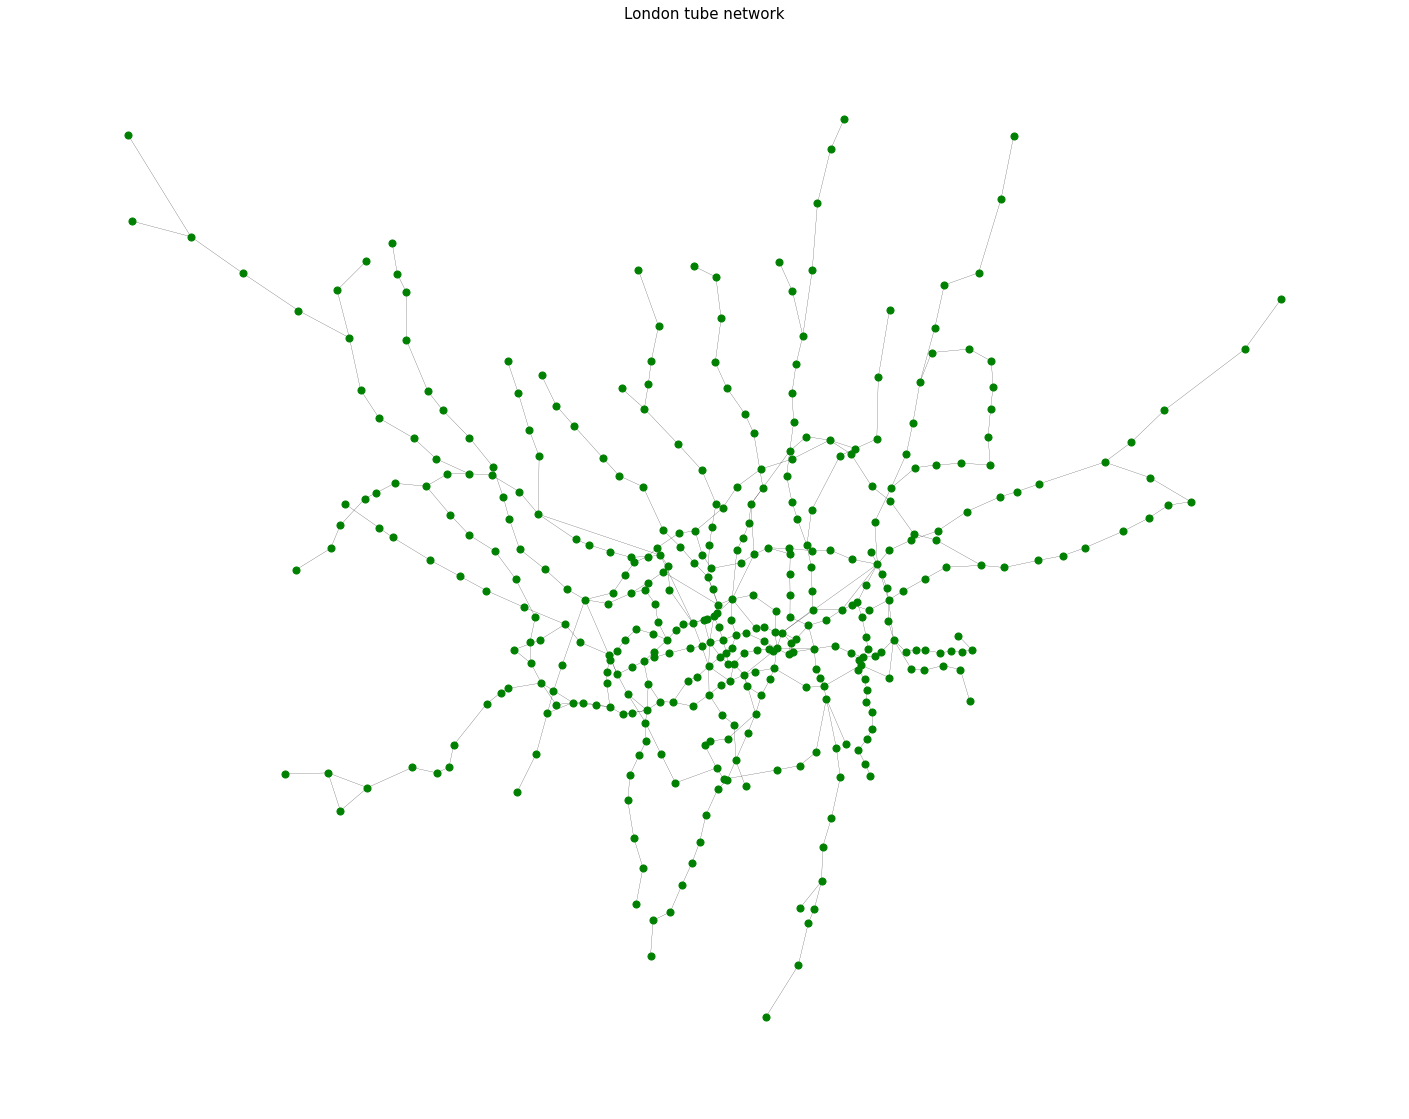

In [5]:
# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

node_labels = nx.get_node_attributes(UG, 'station_name')

pos = nx.get_node_attributes(UG, 'coords')

nx.draw_networkx_nodes(UG,pos,node_size=50,node_color='green')
nx.draw_networkx_edges(UG,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(UG,pos, node_labels, font_size=10, font_color='black')

plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()

In [6]:
df = nx.to_pandas_edgelist(UG)
df[0:10]

,source,target,length,line_name,flows
0,Wembley Park,Kingsbury,2916.771558,Jubilee,12356
1,Wembley Park,Neasden,2353.165938,Jubilee,6744
2,Wembley Park,Preston Road,1419.735166,Metropolitan,36601
3,Wembley Park,Finchley Road,7266.373927,Metropolitan,55216
4,Kingsbury,Queensbury,1245.995234,Jubilee,9419
5,Queensbury,Canons Park,1693.307343,Jubilee,6385
6,Canons Park,Stanmore,1419.669476,Jubilee,3624
7,Stratford,West Ham,1673.509515,Jubilee,91801
8,Stratford,Mile End,2805.001392,Central,12010
9,Stratford,Leyton,2131.342926,Central,56082


In [7]:
type(UG)

networkx.classes.graph.Graph

In [8]:
list(UG.edges(data=True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})

#### Degree Centrality on nodes

In [9]:
deg_london =nx.degree_centrality(UG)
nx.set_node_attributes(UG,dict(deg_london),'degree')

# To dataframe using the nodes as the index
deg_df = pd.DataFrame(index=UG.nodes())
deg_df['degree'] = pd.Series(nx.get_node_attributes(UG, 'degree'))

deg_df_sorted = deg_df.sort_values(["degree"], ascending=False)
deg_df_sorted[0:10]

,degree
Stratford,0.0225
Bank and Monument,0.0200
King's Cross St. Pancras,0.0175
Baker Street,0.0175
Earl's Court,0.0150
Oxford Circus,0.0150
Liverpool Street,0.0150
Waterloo,0.0150
Green Park,0.0150
Canning Town,0.0150


#### Closeness Centrality(T) on nodes:

In [10]:
#topological closeness centrality
clos_t=nx.closeness_centrality(UG)
# We can add these values to the nodes attributes:
nx.set_node_attributes(UG,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=UG.nodes())
df['closeness_t'] = pd.Series(nx.get_node_attributes(UG, 'closeness_t'))

clos_df_sorted = df.sort_values(["closeness_t"], ascending=False)
clos_df_sorted[0:10]

,closeness_t
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Farringdon,0.110742
Angel,0.110742
Moorgate,0.110314


#### Betweenness Centrality(t) on nodes:

In [11]:
bet_london_t=nx.betweenness_centrality(UG,normalized=False)
nx.set_node_attributes(UG,bet_london_t,'betweenness_t')

bet_df = pd.DataFrame(index=UG.nodes())
bet_df['betweenness_t'] = pd.Series(nx.get_node_attributes(UG, 'betweenness_t'))

bet_df_sorted = bet_df.sort_values(["betweenness_t"], ascending=False)
bet_df_sorted[0:10]

,betweenness_t
Stratford,23768.093434
Bank and Monument,23181.058947
Liverpool Street,21610.387049
King's Cross St. Pancras,20373.521465
Waterloo,19464.882323
Green Park,17223.622114
Euston,16624.275469
Westminster,16226.155916
Baker Street,15287.107612
Finchley Road,13173.758009


In [12]:
UG_cc=nx.average_clustering(UG)
diameter = nx.diameter(UG)
global_eff=nx.global_efficiency(UG)
print(f'avg clustering coefficient: {UG_cc}')
print(f'the diameter of UG is : {diameter}')
print(f'the global efficiency is : {global_eff}')

avg clustering coefficient: 0.030382377389858693
the diameter of UG is : 36
the global efficiency is : 0.1012561935972123


### 1.2 Impact measures

In [13]:
# clustering coefficient and the global efficiency 

### 1.3 Node removal

#### A)Non-sequential

In [14]:
#print(nx.is_connected(UGb))
#print(nx.number_connected_components(UGb))

In [15]:
import pandas as pd

In [16]:
tdf1=pd.DataFrame()
tdf2=pd.DataFrame()
tdf3=pd.DataFrame()

In [17]:
#4 measures: global efficient; biggest component ratio; clustering coeffient; shortest path

In [18]:
#Betweenness Centrality
UGb=UG.copy()
i=1
while i < 11:
    bet_val=[(x[1]['betweenness_t']) for x in UGb.nodes(data=True)]
    maxbet=[n for n in UGb.nodes() if UGb.nodes[n]['betweenness_t'] == max(bet_val)]
    c = list()
    c.append(maxbet[0])
    print(c)
    UGb.remove_nodes_from(c)
    
    #the number of the component
    comp=nx.number_connected_components(UGb)
    #calculate Clustering Coefficient
    b_cc=nx.average_clustering(UGb)
    b_ge=nx.global_efficiency(UGb)

    print(f'After {i} removal:')
    print(f'avg clustering coefficient: {b_cc}')
    print(f'the number of the components is: {comp}')
    print(f'the global efficiency is : {b_ge}')
    
    #calculate largest component's diameter
    Largest_subgraph = UGb.subgraph(max( nx.connected_components(UGb), key=len))
    diameter = nx.diameter(Largest_subgraph)
    print(f'the diameter of the biggest component is : {diameter}')
    
    tdf1=tdf1.append(pd.DataFrame({'Non_B_CC':[b_cc],'Non_B_GE':[b_ge],'index':[i]}),ignore_index=True)
    
    i=i+1

['Stratford']
After 1 removal:
avg clustering coefficient: 0.030625000000000003
the number of the components is: 3
the global efficiency is : 0.08891736066510689
the diameter of the biggest component is : 49
['Bank and Monument']
After 2 removal:
avg clustering coefficient: 0.030027449576321755
the number of the components is: 3
the global efficiency is : 0.08586164448742485
the diameter of the biggest component is : 49
['Liverpool Street']
After 3 removal:
avg clustering coefficient: 0.030102895429528594
the number of the components is: 3
the global efficiency is : 0.08496349266423939
the diameter of the biggest component is : 49
["King's Cross St. Pancras"]
After 4 removal:
avg clustering coefficient: 0.03034664747511095
the number of the components is: 4
the global efficiency is : 0.07849775440713821
the diameter of the biggest component is : 49
['Waterloo']
After 5 removal:
avg clustering coefficient: 0.02932900432900433
the number of the components is: 4
the global efficiency is :

In [19]:
#degree centrality
UGd=UG.copy()

i=1
while i < 11:
    deg_val=[(x[1]['degree']) for x in UGd.nodes(data=True)]
    maxdeg=[n for n in UGd.nodes() if UGd.nodes[n]['degree'] == max(deg_val)]
    c = list()
    c.append(maxdeg[0])
    print(c)
    UGd.remove_nodes_from(c)
    
    
    #the number of the component
    comp=nx.number_connected_components(UGd)
    #calculate Clustering Coefficient
    d_cc=nx.average_clustering(UGd)
    d_ge=nx.global_efficiency(UGd)
    print(f'After {i} removal:')
    print(f'avg clustering coefficient: {d_cc}')
    print(f'the number of the components is: {comp}')
    print(f'the global efficiency is : {d_ge}')
    
    #calculate largest component's diameter
    Largest_subgraph = UGd.subgraph(max( nx.connected_components(UGd), key=len))
    diameter = nx.diameter(Largest_subgraph)
    print(f'the diameter of the biggest component is : {diameter}')
    
    tdf2=tdf2.append(pd.DataFrame({'Non_D_CC':[d_cc],'Non_D_GE':[d_ge],'index':[i]}),ignore_index=True)
    
    i=i+1
    


['Stratford']
After 1 removal:
avg clustering coefficient: 0.030625000000000003
the number of the components is: 3
the global efficiency is : 0.08891736066510689
the diameter of the biggest component is : 49
['Bank and Monument']
After 2 removal:
avg clustering coefficient: 0.030027449576321755
the number of the components is: 3
the global efficiency is : 0.08586164448742485
the diameter of the biggest component is : 49
['Baker Street']
After 3 removal:
avg clustering coefficient: 0.027051926298157458
the number of the components is: 3
the global efficiency is : 0.08203328759057034
the diameter of the biggest component is : 49
["King's Cross St. Pancras"]
After 4 removal:
avg clustering coefficient: 0.027287993282955506
the number of the components is: 4
the global efficiency is : 0.07570039409751211
the diameter of the biggest component is : 49
['West Ham']
After 5 removal:
avg clustering coefficient: 0.024410774410774414
the number of the components is: 5
the global efficiency is : 0

In [20]:
#Closeness Centrality
UGc=UG.copy()
i=1
while i < 11:
    clo_val=[(x[1]['closeness_t']) for x in UGc.nodes(data=True)]
    maxclo=[n for n in UGc.nodes() if UGc.nodes[n]['closeness_t'] == max(clo_val)]
    c = list()
    c.append(maxclo[0])
    print(c)
    UGc.remove_nodes_from(c)

    #the number of the component
    comp=nx.number_connected_components(UGc)
    #calculate Clustering Coefficient
    C_cc=nx.average_clustering(UGc)
    C_ge=nx.global_efficiency(UGc)
    
    print(f'After {i} removal:')
    print(f'avg clustering coefficient: {C_cc}')
    print(f'the number of the components is: {comp}')
    print(f'the global efficiency is : {C_ge}')
    
    #calculate largest component's diameter
    Largest_subgraph = UGc.subgraph(max( nx.connected_components(UGc), key=len))
    diameter = nx.diameter(Largest_subgraph)
    print(f'the diameter of the biggest component is : {diameter}')
    
    tdf3=tdf3.append(pd.DataFrame({'Non_C_CC':[C_cc],'Non_C_GE':[C_ge],'index':[i]}),ignore_index=True)
    
    i=i+1

['Green Park']
After 1 removal:
avg clustering coefficient: 0.02979166666666667
the number of the components is: 1
the global efficiency is : 0.09918991960788402
the diameter of the biggest component is : 36
['Bank and Monument']
After 2 removal:
avg clustering coefficient: 0.02927556987707364
the number of the components is: 1
the global efficiency is : 0.09487232544791133
the diameter of the biggest component is : 38
["King's Cross St. Pancras"]
After 3 removal:
avg clustering coefficient: 0.02951663077291218
the number of the components is: 1
the global efficiency is : 0.08793385149140875
the diameter of the biggest component is : 42
['Westminster']
After 4 removal:
avg clustering coefficient: 0.028079644956219268
the number of the components is: 1
the global efficiency is : 0.08737164566976727
the diameter of the biggest component is : 42
['Waterloo']
After 5 removal:
avg clustering coefficient: 0.028150553150553155
the number of the components is: 1
the global efficiency is : 0.08

In [21]:
tdf=pd.merge(tdf1,tdf2,on='index',how='inner')
tdf=pd.merge(tdf,tdf3,on='index',how='inner')
df=tdf.drop_duplicates(subset = None, keep = 'first')
df=df.set_index('index')
df

,Non_B_CC,Non_B_GE,Non_D_CC,Non_D_GE,Non_C_CC,Non_C_GE
index,,,,,,
1,0.030625,0.088917,0.030625,0.088917,0.029792,0.099190
2,0.030027,0.085862,0.030027,0.085862,0.029276,0.094872
3,0.030103,0.084963,0.027052,0.082033,0.029517,0.087934
4,0.030347,0.078498,0.027288,0.075700,0.028080,0.087372
5,0.029329,0.075942,0.024411,0.073022,0.028151,0.084859
6,0.028306,0.074152,0.024473,0.068935,0.029910,0.082781
7,0.024994,0.068206,0.023435,0.067219,0.030034,0.082581
8,0.025058,0.067660,0.021968,0.066221,0.030110,0.082600
9,0.021599,0.064700,0.023724,0.065362,0.030187,0.082622


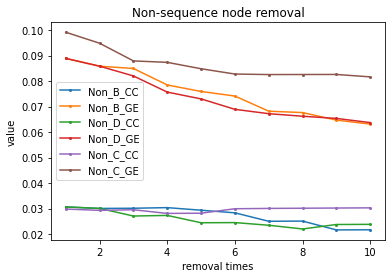

In [22]:
plt.title('Non-sequence node removal')
plt.xlabel('removal times')
plt.ylabel('value')

x=range(1,11)
plt.plot(x,df.iloc[:,0],marker='o',markersize=2)
plt.plot(x,df.iloc[:,1],marker='o',markersize=2)
plt.plot(x,df.iloc[:,2],marker='o',markersize=2)
plt.plot(x,df.iloc[:,3],marker='o',markersize=2)
plt.plot(x,df.iloc[:,4],marker='o',markersize=2)
plt.plot(x,df.iloc[:,5],marker='o',markersize=2)

name=df.columns
plt.legend(name)
plt.show()

#### B) sequential

##### betweenness centrality

In [23]:
tdf4=pd.DataFrame()
tdf5=pd.DataFrame()
tdf6=pd.DataFrame()

In [24]:
#betweenness centrality
UGb=UG.copy()
i=1
while i < 11:
    bet_val=[(x[1]['betweenness_t']) for x in UGb.nodes(data=True)]
    maxbet=[n for n in UGb.nodes() if UGb.nodes[n]['betweenness_t'] == max(bet_val)]
    c = list()
    c.append(maxbet[0])
    UGb.remove_nodes_from(c)
    
    #the number of the component
    comp=nx.number_connected_components(UGb)
    #calculate Clustering Coefficient
    b_cc=nx.average_clustering(UGb)
    b_ge=nx.global_efficiency(UGb)
    #calculate largest component's diameter
    Largest_subgraph = UGb.subgraph(max( nx.connected_components(UGb), key=len))
    diameter = nx.diameter(Largest_subgraph)

    print(f'After {i} removal:')
    print(f'avg clustering coefficient: {b_cc}')
    print(f'the number of the components is: {comp}')
    print(f'the global efficiency is : {b_ge}')
    print(f'the diameter of the biggest component is : {diameter}')
    
    #calculate centrality again
    bet_london_t=nx.betweenness_centrality(UGb,normalized=False)
    nx.set_node_attributes(UGb,bet_london_t,'betweenness_t')
    
    # To dataframe using the nodes as the index
    bet_df = pd.DataFrame(index=UGb.nodes())
    bet_df['betweenness_t'] = pd.Series(nx.get_node_attributes(UGb, 'betweenness_t'))
    
    tdf4=tdf4.append(pd.DataFrame({'Sequ_B_CC':[b_cc],'Sequ_B_GE':[b_ge],'index':[i]}),ignore_index=True)
    
    i=i+1

After 1 removal:
avg clustering coefficient: 0.030625000000000003
the number of the components is: 3
the global efficiency is : 0.08891736066510689
the diameter of the biggest component is : 49
After 2 removal:
avg clustering coefficient: 0.030868838763575608
the number of the components is: 3
the global efficiency is : 0.08460293133575152
the diameter of the biggest component is : 49
After 3 removal:
avg clustering coefficient: 0.02997128499641063
the number of the components is: 3
the global efficiency is : 0.08182895253292936
the diameter of the biggest component is : 49
After 4 removal:
avg clustering coefficient: 0.02925512774379273
the number of the components is: 3
the global efficiency is : 0.07767794342812263
the diameter of the biggest component is : 49
After 5 removal:
avg clustering coefficient: 0.02932900432900433
the number of the components is: 3
the global efficiency is : 0.07283234083472483
the diameter of the biggest component is : 55
After 6 removal:
avg clustering c

##### closeness centrality

In [25]:
#closeness centrality
UGc=UG.copy()
i=1
while i < 11:
    clo_val=[(x[1]['closeness_t']) for x in UGc.nodes(data=True)]
    maxclo=[n for n in UGc.nodes() if UGc.nodes[n]['closeness_t'] == max(clo_val)]
    c = list()
    c.append(maxclo[0])
    UGc.remove_nodes_from(c)
    
    #the number of the component
    comp=nx.number_connected_components(UGc)
    #calculate Clustering Coefficient
    C_cc=nx.average_clustering(UGc)
    C_ge=nx.global_efficiency(UGc)
    #calculate largest component's diameter
    Largest_subgraph = UGc.subgraph(max( nx.connected_components(UGc), key=len))
    diameter = nx.diameter(Largest_subgraph)

    print(f'After {i} removal:')
    print(f'avg clustering coefficient: {C_cc}')
    print(f'the number of the components is: {comp}')
    print(f'the global efficiency is : {C_ge}')
    print(f'the diameter of the biggest component is : {diameter}')
    
    #calculate centrality again
    clos_t=nx.closeness_centrality(UGc)
    nx.set_node_attributes(UGc,clos_t,'closeness_t')

    # To dataframe using the nodes as the index
    df = pd.DataFrame(index=UGc.nodes())
    df['closeness_t'] = pd.Series(nx.get_node_attributes(UGc, 'closeness_t'))
    
    tdf5=tdf5.append(pd.DataFrame({'Sequ_C_CC':[C_cc],'Sequ_C_GE':[C_ge],'index':[i]}),ignore_index=True)
    
    i=i+1

After 1 removal:
avg clustering coefficient: 0.02979166666666667
the number of the components is: 1
the global efficiency is : 0.09918991960788402
the diameter of the biggest component is : 36
After 2 removal:
avg clustering coefficient: 0.03003341687552214
the number of the components is: 1
the global efficiency is : 0.09443475025566316
the diameter of the biggest component is : 38
After 3 removal:
avg clustering coefficient: 0.028715003589375454
the number of the components is: 1
the global efficiency is : 0.09181648060183005
the diameter of the biggest component is : 40
After 4 removal:
avg clustering coefficient: 0.028079644956219268
the number of the components is: 1
the global efficiency is : 0.08542563066911478
the diameter of the biggest component is : 42
After 5 removal:
avg clustering coefficient: 0.028150553150553155
the number of the components is: 1
the global efficiency is : 0.08054424756502003
the diameter of the biggest component is : 50
After 6 removal:
avg clustering 

##### degree centrality

In [26]:
#degree centrality
UGd=UG.copy()
i=1
while i < 11:
    deg_val=[(x[1]['degree']) for x in UGd.nodes(data=True)]
    maxdeg=[n for n in UGd.nodes() if UGd.nodes[n]['degree'] == max(deg_val)]
    c = list()
    c.append(maxdeg[0])
    UGd.remove_nodes_from(c)
    
    #the number of the component
    comp=nx.number_connected_components(UGd)
    #calculate Clustering Coefficient
    d_cc=nx.average_clustering(UGd)
    d_ge=nx.global_efficiency(UGd)
    #calculate largest component's diameter
    Largest_subgraph = UGd.subgraph(max( nx.connected_components(UGd), key=len))
    diameter = nx.diameter(Largest_subgraph)

    print(f'After {i} removal:')
    print(f'avg clustering coefficient: {d_cc}')
    print(f'the number of the components is: {comp}')
    print(f'the global efficiency is : {d_ge}')
    print(f'the diameter of the biggest component is : {diameter}')
    
    # calculate the degree centrality again
    deg_london =nx.degree_centrality(UGd)
    nx.set_node_attributes(UGd,dict(deg_london),'degree')

    # To dataframe using the nodes as the index
    deg_df = pd.DataFrame(index=UGd.nodes())
    deg_df['degree'] = pd.Series(nx.get_node_attributes(UGd, 'degree'))
    
    tdf6=tdf6.append(pd.DataFrame({'Sequ_D_CC':[d_cc],'Sequ_D_GE':[d_ge],'index':[i]}),ignore_index=True)
    
    i=i+1

After 1 removal:
avg clustering coefficient: 0.030625000000000003
the number of the components is: 3
the global efficiency is : 0.08891736066510689
the diameter of the biggest component is : 49
After 2 removal:
avg clustering coefficient: 0.030027449576321755
the number of the components is: 3
the global efficiency is : 0.08586164448742485
the diameter of the biggest component is : 49
After 3 removal:
avg clustering coefficient: 0.027051926298157458
the number of the components is: 3
the global efficiency is : 0.08203328759057034
the diameter of the biggest component is : 49
After 4 removal:
avg clustering coefficient: 0.027287993282955506
the number of the components is: 4
the global efficiency is : 0.07570039409751211
the diameter of the biggest component is : 49
After 5 removal:
avg clustering coefficient: 0.024410774410774414
the number of the components is: 6
the global efficiency is : 0.07039592695635104
the diameter of the biggest component is : 50
After 6 removal:
avg clusterin

In [27]:
tdf=pd.merge(tdf4,tdf5,on='index',how='inner')
tdf=pd.merge(tdf,tdf6,on='index',how='inner')
df=tdf.drop_duplicates(subset = None, keep = 'first')
df=df.set_index('index')
df

,Sequ_B_CC,Sequ_B_GE,Sequ_C_CC,Sequ_C_GE,Sequ_D_CC,Sequ_D_GE
index,,,,,,
1,0.030625,0.088917,0.029792,0.099190,0.030625,0.088917
2,0.030869,0.084603,0.030033,0.094435,0.030027,0.085862
3,0.029971,0.081829,0.028715,0.091816,0.027052,0.082033
4,0.029255,0.077678,0.028080,0.085426,0.027288,0.075700
5,0.029329,0.072832,0.028151,0.080544,0.024411,0.070396
6,0.029403,0.053210,0.028222,0.058101,0.023376,0.069402
7,0.022625,0.051656,0.028378,0.051884,0.016582,0.067772
8,0.022683,0.045844,0.021580,0.050350,0.015098,0.065936
9,0.019339,0.041631,0.021635,0.044395,0.016837,0.065069


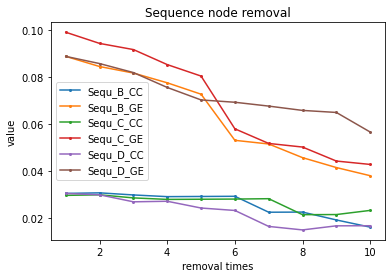

In [28]:
plt.title('Sequence node removal')
plt.xlabel('removal times')
plt.ylabel('value')

x=range(1,11)
plt.plot(x,df.iloc[:,0],marker='o',markersize=2)
plt.plot(x,df.iloc[:,1],marker='o',markersize=2)
plt.plot(x,df.iloc[:,2],marker='o',markersize=2)
plt.plot(x,df.iloc[:,3],marker='o',markersize=2)
plt.plot(x,df.iloc[:,4],marker='o',markersize=2)
plt.plot(x,df.iloc[:,5],marker='o',markersize=2)

name=df.columns
plt.legend(name)
plt.show()

## 2. Flows: weighted network

### 2.1 adjusted centrality measure

In [29]:
#calculate the inversed value of flows
inv_weights={}
for e1, e2, weight in UG.edges(data='flows'):
    if weight>0:
        inv_weights[e1, e2]=round(1./weight,9)
    else:
        inv_weights[e1, e2]=0

# Let us add the inversed weight as an attribute to the edges in the graph
nx.set_edge_attributes(UG, inv_weights, 'inv_weights')

# Print edge list with attributes
list(UG.edges(data = True))[0:1]

[('Wembley Park',
  'Kingsbury',
  {'length': 2916.7715580506483,
   'line_name': 'Jubilee',
   'flows': 12356,
   'inv_weights': 8.0932e-05})]

In [30]:
# re-calculate the betweenness centrality
bet_london_w=nx.betweenness_centrality(UG,weight='inv_weights',normalized=False)
nx.set_node_attributes(UG,bet_london_w,'betweenness_w')

bet_df = pd.DataFrame(index=UG.nodes())
bet_df['betweenness_w'] = pd.Series(nx.get_node_attributes(UG, 'betweenness_w'))

bet_df_sorted = bet_df.sort_values(["betweenness_w"], ascending=False)
bet_df_sorted[0:10]

,betweenness_w
Green Park,44892.50
Bank and Monument,39758.50
Waterloo,31904.25
Westminster,29664.50
Liverpool Street,26530.00
Stratford,26125.00
Bond Street,22996.50
Euston,22314.00
Oxford Circus,21207.00
Warren Street,19916.00


In [31]:
bet_df = pd.DataFrame(index=UG.edges())
bet_df['inv_weights'] = pd.Series(nx.get_edge_attributes(UG, 'inv_weights'))

bet_df_sorted = bet_df.sort_values(["inv_weights"], ascending=True)
bet_df_sorted[0:10]

inv_weights
Wandsworth Road         Battersea Park               0.000000
Battersea Power Station Nine Elms                    0.000000
Kennington              Nine Elms                    0.000000
Waterloo                Westminster                  0.000005
                        Bank and Monument            0.000005
Westminster             Green Park                   0.000005
Bank and Monument       Liverpool Street             0.000006
Stratford               Liverpool Street             0.000007
Green Park              Bond Street                  0.000007
Euston                  King's Cross St. Pancras     0.000008

### 2.2 Impact adjusted measures

In [32]:
# global efficiency and average shortest paths

#### Define the weighted global efficiency and calculate the orginal value

In [33]:
def gglobal_efficiency(G):
    n = len(G)
    denom = n * (n - 1)
    if denom != 0:
        lengths = nx.all_pairs_dijkstra_path_length(G,weight='inv_weights')
        g_eff = 0
        for source, targets in lengths:
            for target, distance in targets.items():
                if distance > 0:
                    g_eff += 1 / distance
        g_eff /= denom
    else:
        g_eff = 0
    return g_eff

In [34]:
GE=gglobal_efficiency(UG)
print(f'The global efficiency is : {GE}')

The global efficiency is : 2724.4518898281003


#### the orginal average shortest path

In [219]:
asp=nx.average_shortest_path_length(UG, weight='inv_weights')
asp=1/asp
print(f'The average shortest path is : {asp}')

The average shortest path is : 1232.2997391971871


### 2.3 Impact adjusted measures

#### A)remove the highest node using betweenness centrality in part 1

In [36]:
# original betweenness centrality
#global efficiency

In [221]:
UG1=UG.copy()

bet_val=[(x[1]['betweenness_t']) for x in UG1.nodes(data=True)]
maxbet=[n for n in UG1.nodes() if UG1.nodes[n]['betweenness_t'] == max(bet_val)]
UG1.remove_nodes_from(maxbet)
maxbet

['Stratford']

In [222]:
GE1=gglobal_efficiency(UG1)
print(f'The global efficiency is : {GE1}')

The global efficiency is : 2286.0157202508904


In [223]:
components = nx. connected_components(UG1)
largest_component = max(components,key=len)
print(len(largest_component))

379


In [224]:
largest_subgraph = UG1.subgraph(largest_component)
d=nx.average_shortest_path_length(largest_subgraph, weight='inv_weights')
d=1/d
print(f'The average shortest path is : {d}')

The average shortest path is : 896.3285728246215


#### B)remove the highest node using adjusted centrality

In [43]:
UG2=UG.copy()

bet_val=[(x[1]['betweenness_w']) for x in UG2.nodes(data=True)]
maxbet=[n for n in UG2.nodes() if UG2.nodes[n]['betweenness_w'] == max(bet_val)]
#find the target station
UG2.remove_nodes_from(maxbet)
maxbet

['Green Park']

In [44]:
GE2=gglobal_efficiency(UG2)
print(f'The global efficiency is : {GE2}')

The global efficiency is : 2453.5763651558473


In [45]:
components = nx. connected_components(UG2)
largest_component = max(components,key=len)
print(len(largest_component))

400


In [225]:
largest_subgraph = UG2.subgraph(largest_component)
d=nx.average_shortest_path_length(largest_subgraph, weight='inv_weights')
d=1/d
print(f'The average shortest path is : {d}')

The average shortest path is : 873.5052097581939


In [47]:
print(nx.number_connected_components(UG1))
print(nx.number_connected_components(UG2))

3
1


# PART 2:Spatial Interaction models

## 3. Models and calibration

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
import statsmodels.api as sm
import scipy.stats
import numpy as np
from math import sqrt
import statsmodels.formula.api as smf

In [49]:
#load the dataset
URL='https://github.com/Ziwei1405/UrbanSimulation/raw/main/london_flows.csv'
cdata = pd.read_csv(URL)

In [50]:
cdata.head()

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


#### set up the metric calculations

In [51]:
#set up the metric calculations
def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

#### check the value of dataframe 

In [52]:
cdata = cdata[cdata["station_origin"] != cdata["station_destination"]]
cdata = cdata.replace({'jobs':{0:0.0000001}})

#### take the logarithm of them

In [53]:
#take the variables and produce logarithms of them
x_variables = ["population", "jobs", "distance"]
log_x_vars = []
for x in x_variables:
    cdata[f"log_{x}"] = np.log(cdata[x])
    log_x_vars.append(f"log_{x}")

cdata.head()

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance
0,Abbey Road,Bank and Monument,0,599,78549.0,8131.525097,6.395262,11.271478,9.003504
1,Abbey Road,Beckton,1,599,442.0,8510.121774,6.395262,6.091310,9.049012
2,Abbey Road,Blackwall,3,599,665.0,3775.448872,6.395262,6.499787,8.236275
3,Abbey Road,Canary Wharf,1,599,58772.0,5086.514220,6.395262,10.981421,8.534348
4,Abbey Road,Canning Town,37,599,15428.0,2228.923167,6.395262,9.643939,7.709274


In [54]:
doub_data=cdata

In [55]:
dbl_form1 = 'flows ~ station_destination + station_origin + log_distance-1'
doubSim1 = smf.glm(formula = dbl_form1, data=doub_data, family=sm.families.Poisson()).fit()

dbl_form2 = 'flows ~ station_destination + station_origin + distance-1'
doubSim2 = smf.glm(formula = dbl_form2, data=doub_data, family=sm.families.Poisson()).fit()

In [56]:
print(doubSim2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    60658
Model Family:                 Poisson   Df Model:                          797
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.5105e+05
Date:                Mon, 02 May 2022   Deviance:                   1.5299e+06
Time:                        23:10:48   Pearson chi2:                 2.02e+06
No. Iterations:                    27                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [57]:
doub_data["doubSimEst1"] = np.round(doubSim1.mu,0)
doub_data["doubSimEst2"] = np.round(doubSim2.mu,0)

#### Power R^2 and RMSE

In [58]:
CalcRSqaured(doub_data["flows"], doub_data["doubSimEst1"])

0.40770034724103543

In [59]:
CalcRMSE(doub_data["flows"], doub_data["doubSimEst1"])

101.3

#### Exponential R^2 and RMSE

In [60]:
CalcRSqaured(doub_data["flows"], doub_data["doubSimEst2"])

0.4978554141117547

In [61]:
CalcRMSE(doub_data["flows"], doub_data["doubSimEst2"])

93.368

## 4. Scenarios

In [62]:
cdata.head()

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,doubSimEst1,doubSimEst2
0,Abbey Road,Bank and Monument,0,599,78549.0,8131.525097,6.395262,11.271478,9.003504,55.0,77.0
1,Abbey Road,Beckton,1,599,442.0,8510.121774,6.395262,6.091310,9.049012,2.0,3.0
2,Abbey Road,Blackwall,3,599,665.0,3775.448872,6.395262,6.499787,8.236275,3.0,4.0
3,Abbey Road,Canary Wharf,1,599,58772.0,5086.514220,6.395262,10.981421,8.534348,77.0,112.0
4,Abbey Road,Canning Town,37,599,15428.0,2228.923167,6.395262,9.643939,7.709274,45.0,48.0


In [63]:
x=cdata.sort_values(by=['log_jobs'],ascending= True)
x

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,doubSimEst1,doubSimEst2
21906,Haggerston,Battersea Park,0,2049,1.000000e-07,16384.952185,7.625107,-16.118096,9.704119,0.0,0.0
13687,Dalston Junction,Battersea Park,0,3912,1.000000e-07,17192.960480,8.271804,-16.118096,9.752255,0.0,0.0
8518,Canada Water,Battersea Park,0,27026,1.000000e-07,10440.366798,10.204555,-16.118096,9.253435,0.0,0.0
11571,Clapham High Street,Battersea Park,0,1500,1.000000e-07,1790.459591,7.313220,-16.118096,7.490228,0.0,0.0
26650,Honor Oak Park,Battersea Park,0,1750,1.000000e-07,14936.019983,7.467371,-16.118096,9.611531,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
16970,Elverson Road,Bank and Monument,255,1151,7.854900e+04,10950.813910,7.048386,11.271478,9.301169,115.0,136.0
29745,King George V,Bank and Monument,153,969,7.854900e+04,12012.317783,6.876265,11.271478,9.393688,93.0,88.0
45195,Shepherd's Bush Market,Bank and Monument,3,1798,7.854900e+04,12230.932287,7.494430,11.271478,9.411723,61.0,60.0
12480,Colliers Wood,Bank and Monument,427,5553,7.854900e+04,12611.771754,8.622094,11.271478,9.442386,263.0,321.0


### Scenario A —— production constrained model

#### run the production constrained model

In [64]:
formula = 'flows ~ station_origin + log_jobs + distance-1'
prodSim = smf.glm(formula = formula, data=cdata, family=sm.families.Poisson()).fit()
print(prodSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    61055
Model Family:                 Poisson   Df Model:                          400
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.0994e+05
Date:                Mon, 02 May 2022   Deviance:                   1.6477e+06
Time:                        23:11:43   Pearson chi2:                 2.40e+06
No. Iterations:                    26                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [65]:
cdata["ProdEst1"] = np.round(prodSim.mu,0)

In [66]:
cdata.head()

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,doubSimEst1,doubSimEst2,ProdEst1
0,Abbey Road,Bank and Monument,0,599,78549.0,8131.525097,6.395262,11.271478,9.003504,55.0,77.0,78.0
1,Abbey Road,Beckton,1,599,442.0,8510.121774,6.395262,6.091310,9.049012,2.0,3.0,1.0
2,Abbey Road,Blackwall,3,599,665.0,3775.448872,6.395262,6.499787,8.236275,3.0,4.0,4.0
3,Abbey Road,Canary Wharf,1,599,58772.0,5086.514220,6.395262,10.981421,8.534348,77.0,112.0,99.0
4,Abbey Road,Canning Town,37,599,15428.0,2228.923167,6.395262,9.643939,7.709274,45.0,48.0,56.0


In [67]:
#create some Oi and Dj columns in the dataframe 
O_i = pd.DataFrame(cdata.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)

cdata = cdata.merge(O_i, on = "station_origin", how = "left" )
cdata.head()

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,doubSimEst1,doubSimEst2,ProdEst1,O_i
0,Abbey Road,Bank and Monument,0,599,78549.0,8131.525097,6.395262,11.271478,9.003504,55.0,77.0,78.0,599
1,Abbey Road,Beckton,1,599,442.0,8510.121774,6.395262,6.091310,9.049012,2.0,3.0,1.0,599
2,Abbey Road,Blackwall,3,599,665.0,3775.448872,6.395262,6.499787,8.236275,3.0,4.0,4.0,599
3,Abbey Road,Canary Wharf,1,599,58772.0,5086.514220,6.395262,10.981421,8.534348,77.0,112.0,99.0,599
4,Abbey Road,Canning Town,37,599,15428.0,2228.923167,6.395262,9.643939,7.709274,45.0,48.0,56.0,599


In [68]:
coefs = pd.DataFrame(prodSim.params)
coefs.reset_index(inplace=True)

coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")

#join them back into the dataframes
cdata = cdata.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
cdata.drop(columns = ["coef"], inplace = True)

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_10824/1762024294.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


In [69]:
alpha_i = prodSim.params[0:-2]
gamma = prodSim.params[-2]
beta = -prodSim.params[-1]
beta

0.00015316619346561683

In [70]:
alpha_i.head()

station_origin[Abbey Road]      -2.914322
station_origin[Acton Central]   -1.162092
station_origin[Acton Town]      -1.613081
station_origin[Aldgate]         -2.943047
station_origin[Aldgate East]    -2.854752
dtype: float64

In [71]:
cdata["prodsimest1"] = np.exp(cdata["alpha_i"]+gamma*cdata["log_jobs"] 
                                 - beta*cdata["distance"])
cdata["prodsimest1"] = round(cdata["prodsimest1"])

In [72]:
cdata.head()

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,doubSimEst1,doubSimEst2,ProdEst1,O_i,alpha_i,prodsimest1
0,Abbey Road,Bank and Monument,0,599,78549.0,8131.525097,6.395262,11.271478,9.003504,55.0,77.0,78.0,599,-2.914322,78.0
1,Abbey Road,Beckton,1,599,442.0,8510.121774,6.395262,6.091310,9.049012,2.0,3.0,1.0,599,-2.914322,1.0
2,Abbey Road,Blackwall,3,599,665.0,3775.448872,6.395262,6.499787,8.236275,3.0,4.0,4.0,599,-2.914322,4.0
3,Abbey Road,Canary Wharf,1,599,58772.0,5086.514220,6.395262,10.981421,8.534348,77.0,112.0,99.0,599,-2.914322,99.0
4,Abbey Road,Canning Town,37,599,15428.0,2228.923167,6.395262,9.643939,7.709274,45.0,48.0,56.0,599,-2.914322,56.0


### Canary Wharf has a 50% decrease in jobs 

In [73]:
def new_job(row):
    if row["station_destination"] == "Canary Wharf":
        x=row["jobs"]
        val = x/2
    else:
        val = row["jobs"]
    return val

In [74]:
cdata["jobs_Scenario"] = cdata.apply(new_job, axis =1)
cdata.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,doubSimEst1,doubSimEst2,ProdEst1,O_i,alpha_i,prodsimest1,jobs_Scenario
0,Abbey Road,Bank and Monument,0,599,78549.0,8131.525097,6.395262,11.271478,9.003504,55.0,77.0,78.0,599,-2.914322,78.0,78549.0
1,Abbey Road,Beckton,1,599,442.0,8510.121774,6.395262,6.091310,9.049012,2.0,3.0,1.0,599,-2.914322,1.0,442.0
2,Abbey Road,Blackwall,3,599,665.0,3775.448872,6.395262,6.499787,8.236275,3.0,4.0,4.0,599,-2.914322,4.0,665.0
3,Abbey Road,Canary Wharf,1,599,58772.0,5086.514220,6.395262,10.981421,8.534348,77.0,112.0,99.0,599,-2.914322,99.0,29386.0
4,Abbey Road,Canning Town,37,599,15428.0,2228.923167,6.395262,9.643939,7.709274,45.0,48.0,56.0,599,-2.914322,56.0,15428.0
5,Abbey Road,Crossharbour,1,599,1208.0,6686.475560,6.395262,7.096721,8.807842,3.0,5.0,4.0,599,-2.914322,4.0,1208.0
6,Abbey Road,Custom House,0,599,845.0,3824.855630,6.395262,6.739337,8.249276,4.0,5.0,5.0,599,-2.914322,5.0,845.0
7,Abbey Road,Cutty Sark,2,599,1748.0,8503.898909,6.395262,7.466228,9.048280,5.0,6.0,4.0,599,-2.914322,4.0,1748.0
8,Abbey Road,Cyprus,7,599,850.0,6532.099618,6.395262,6.745236,8.784484,4.0,5.0,3.0,599,-2.914322,3.0,850.0
9,Abbey Road,Devons Road,1,599,611.0,3958.324171,6.395262,6.415097,8.283576,3.0,4.0,4.0,599,-2.914322,4.0,611.0


#### calculate some new wj^alpha and d_ij^beta values

In [75]:
Dj2_gamma = cdata["jobs"]**gamma
dist_beta = np.exp(cdata["distance"]*-beta)

#calculate the first stage of the Ai values
cdata["Ai1"] = Dj2_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(cdata.groupby(["station_origin"])["Ai1"].agg(np.sum))

In [76]:
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
#and write the A_i values back into the dataframe
cdata = cdata.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [77]:
A_i.head()

,A_i
station_origin,
Abbey Road,0.000091
Acton Central,0.000256
Acton Town,0.000053
Aldgate,0.000018
Aldgate East,0.000018


In [78]:
cdata.head()

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,doubSimEst1,doubSimEst2,ProdEst1,O_i,alpha_i,prodsimest1,jobs_Scenario,Ai1,A_i
0,Abbey Road,Bank and Monument,0,599,78549.0,8131.525097,6.395262,11.271478,9.003504,55.0,77.0,78.0,599,-2.914322,78.0,78549.0,1432.231106,0.000091
1,Abbey Road,Beckton,1,599,442.0,8510.121774,6.395262,6.091310,9.049012,2.0,3.0,1.0,599,-2.914322,1.0,442.0,27.026714,0.000091
2,Abbey Road,Blackwall,3,599,665.0,3775.448872,6.395262,6.499787,8.236275,3.0,4.0,4.0,599,-2.914322,4.0,665.0,75.982904,0.000091
3,Abbey Road,Canary Wharf,1,599,58772.0,5086.514220,6.395262,10.981421,8.534348,77.0,112.0,99.0,599,-2.914322,99.0,29386.0,1834.127325,0.000091
4,Abbey Road,Canning Town,37,599,15428.0,2228.923167,6.395262,9.643939,7.709274,45.0,48.0,56.0,599,-2.914322,56.0,15428.0,1034.750389,0.000091


In [79]:
#to check everything works, recreate the original estimates
cdata["ProdEst2"] = cdata["A_i"]*cdata["O_i"]*Dj2_gamma*dist_beta
cdata["ProdEst2"] = round(cdata["ProdEst2"])
#check
cdata[["ProdEst1", "ProdEst2"]]

,ProdEst1,ProdEst2
0,78.0,78.0
1,1.0,1.0
2,4.0,4.0
3,99.0,99.0
4,56.0,56.0
...,...,...
61451,99.0,99.0
61452,295.0,295.0
61453,36.0,36.0
61454,125.0,125.0


In [80]:
#calculate some new wj^alpha and d_ij^beta values
Dj3_gamma = cdata["jobs_Scenario"]**gamma
#calcualte the first stage of the Ai values
cdata["Ai1"] = Dj3_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(cdata.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"Ai_2"}, inplace=True)
#and write the A_i values back into the dataframe
cdata = cdata.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [81]:
cdata.head()

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,doubSimEst1,doubSimEst2,ProdEst1,O_i,alpha_i,prodsimest1,jobs_Scenario,Ai1,A_i,ProdEst2,Ai_2
0,Abbey Road,Bank and Monument,0,599,78549.0,8131.525097,6.395262,11.271478,9.003504,55.0,77.0,78.0,599,-2.914322,78.0,78549.0,1432.231106,0.000091,78.0,0.000097
1,Abbey Road,Beckton,1,599,442.0,8510.121774,6.395262,6.091310,9.049012,2.0,3.0,1.0,599,-2.914322,1.0,442.0,27.026714,0.000091,1.0,0.000097
2,Abbey Road,Blackwall,3,599,665.0,3775.448872,6.395262,6.499787,8.236275,3.0,4.0,4.0,599,-2.914322,4.0,665.0,75.982904,0.000091,4.0,0.000097
3,Abbey Road,Canary Wharf,1,599,58772.0,5086.514220,6.395262,10.981421,8.534348,77.0,112.0,99.0,599,-2.914322,99.0,29386.0,1086.638602,0.000091,99.0,0.000097
4,Abbey Road,Canning Town,37,599,15428.0,2228.923167,6.395262,9.643939,7.709274,45.0,48.0,56.0,599,-2.914322,56.0,15428.0,1034.750389,0.000091,56.0,0.000097


In [82]:
#to check everything works, recreate the original estimates
cdata["prodsimest_ScenarioA"] = cdata["Ai_2"]*cdata["O_i"]*Dj3_gamma*dist_beta
#round
cdata["prodsimest_ScenarioA"] = round(cdata["prodsimest_ScenarioA"])

In [83]:
cdata_O= cdata.pivot_table(values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdata_O

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [84]:
cdata_ScenarioA= cdata.pivot_table(values ="prodsimest_ScenarioA", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdata_ScenarioA

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,597.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1226.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,13.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3750.0
Aldgate,NaN,NaN,1.0,NaN,38.0,NaN,NaN,0.0,NaN,28.0,...,2.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2886.0
Aldgate East,NaN,NaN,1.0,41.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,0.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,1.0,42.0,53.0,NaN,NaN,NaN,NaN,31.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4860.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,2.0,19.0,19.0,NaN,0.0,NaN,NaN,32.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3102.0


### Senario B:  a significant increase in the cost of transport

In [85]:
beta

0.00015316619346561683

In [86]:
cdata.had()

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,doubSimEst1,...,ProdEst1,O_i,alpha_i,prodsimest1,jobs_Scenario,Ai1,A_i,ProdEst2,Ai_2,prodsimest_ScenarioA
0,Abbey Road,Bank and Monument,0,599,78549.0,8131.525097,6.395262,11.271478,9.003504,55.0,...,78.0,599,-2.914322,78.0,78549.0,1432.231106,0.000091,78.0,0.000097,83.0
1,Abbey Road,Beckton,1,599,442.0,8510.121774,6.395262,6.091310,9.049012,2.0,...,1.0,599,-2.914322,1.0,442.0,27.026714,0.000091,1.0,0.000097,2.0
2,Abbey Road,Blackwall,3,599,665.0,3775.448872,6.395262,6.499787,8.236275,3.0,...,4.0,599,-2.914322,4.0,665.0,75.982904,0.000091,4.0,0.000097,4.0
3,Abbey Road,Canary Wharf,1,599,58772.0,5086.514220,6.395262,10.981421,8.534348,77.0,...,99.0,599,-2.914322,99.0,29386.0,1086.638602,0.000091,99.0,0.000097,63.0
4,Abbey Road,Canning Town,37,599,15428.0,2228.923167,6.395262,9.643939,7.709274,45.0,...,56.0,599,-2.914322,56.0,15428.0,1034.750389,0.000091,56.0,0.000097,60.0


In [87]:
beta1=0.0003
beta2=0.0015

In [88]:
#BETA1

In [89]:
Dj2_gamma = cdata["jobs"]**gamma
dist_beta = np.exp(cdata["distance"]*-beta1)

#calculate the first stage of the Ai values
cdata["Ai1"] = Dj2_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(cdata.groupby(["station_origin"])["Ai1"].agg(np.sum))

In [90]:
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_Beta1"}, inplace=True)
#and write the A_i values back into the dataframe
cdata = cdata.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [91]:
A_i.head()

,A_Beta1
station_origin,
Abbey Road,0.000239
Acton Central,0.001581
Acton Town,0.000664
Aldgate,0.000060
Aldgate East,0.000062


In [92]:
#create the estimates
cdata["ProdEstB1"] = cdata["A_Beta1"]*cdata["O_i"]*Dj2_gamma*dist_beta
cdata["ProdEstB1"] = round(cdata["ProdEstB1"])

In [93]:
#beta2=0.0009
Dj2_gamma = cdata["jobs"]**gamma
dist_beta = np.exp(cdata["distance"]*-beta2)

#calculate the first stage of the Ai values
cdata["Ai1"] = Dj2_gamma * dist_beta
#now do the sum 
A_i = pd.DataFrame(cdata.groupby(["station_origin"])["Ai1"].agg(np.sum))
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_Beta2"}, inplace=True)
#and write the A_i values back into the dataframe
cdata = cdata.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [94]:
#create the estimates
cdata["ProdEstB2"] = cdata["A_Beta2"]*cdata["O_i"]*Dj2_gamma*dist_beta
cdata["ProdEstB2"] = round(cdata["ProdEstB2"])

In [95]:
cdata_ScenarioB1= cdata.pivot_table(values ="ProdEstB1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdata_ScenarioB1

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,597.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1220.0
Acton Town,NaN,NaN,NaN,0.0,0.0,NaN,30.0,0.0,NaN,1.0,...,1.0,0.0,0.0,27.0,NaN,0.0,NaN,0.0,NaN,3740.0
Aldgate,NaN,NaN,0.0,NaN,74.0,NaN,NaN,0.0,NaN,27.0,...,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,2882.0
Aldgate East,NaN,NaN,0.0,84.0,NaN,NaN,0.0,0.0,NaN,27.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,3166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,5.0,11.0,NaN,NaN,NaN,NaN,2.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4861.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,527.0
Woodside Park,NaN,NaN,0.0,2.0,1.0,NaN,0.0,NaN,NaN,7.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3088.0


In [96]:
cdata_ScenarioB2= cdata.pivot_table(values ="ProdEstB2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdata_ScenarioB2

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,598.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1225.0
Acton Town,NaN,NaN,NaN,0.0,0.0,NaN,15.0,0.0,NaN,0.0,...,0.0,0.0,0.0,8.0,NaN,0.0,NaN,0.0,NaN,3743.0
Aldgate,NaN,NaN,0.0,NaN,93.0,NaN,NaN,0.0,NaN,14.0,...,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,2877.0
Aldgate East,NaN,NaN,0.0,111.0,NaN,NaN,0.0,0.0,NaN,14.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,3168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4865.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0
Woodside Park,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3092.0


In [97]:
cdata_O

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [98]:
beta

0.00015316619346561683

#### plot

In [99]:
y=cdata_O[-1:].T
x=cdata_ScenarioA[-1:].T
z=cdata_ScenarioB2[-1:].T
w=cdata_ScenarioB1[-1:].T

y.rename(columns = {'All':'original_flow'} ,inplace=True)
x.rename(columns = {'All':'ScenarioA_flow'} ,inplace=True)
z.rename(columns = {'All':'ScenarioB1_flow'} ,inplace=True)
w.rename(columns = {'All':'ScenarioB2_flow'} ,inplace=True)

In [101]:
data=pd.concat([y,x],axis=1)
data=pd.concat([data,z],axis=1)
data=pd.concat([data,w],axis=1)

data['change_A']=data['ScenarioA_flow']-data['original_flow']
data['change_B1']=data['ScenarioB1_flow']-data['original_flow']
data['change_B2']=data['ScenarioB2_flow']-data['original_flow']

data.head()

station_origin,original_flow,ScenarioA_flow,ScenarioB1_flow,ScenarioB2_flow,change_A,change_B1,change_B2
station_destination,,,,,,,
Abbey Road,345.0,411.0,2196.0,1057.0,66.0,1851.0,712.0
Acton Central,750.0,359.0,522.0,546.0,-391.0,-228.0,-204.0
Acton Town,2202.0,2172.0,5120.0,4263.0,-30.0,2918.0,2061.0
Aldgate,7782.0,8638.0,5197.0,6304.0,856.0,-2585.0,-1478.0
Aldgate East,7932.0,9612.0,5941.0,7291.0,1680.0,-1991.0,-641.0


In [107]:
SA1=data.sort_values(by=['change_A'],ascending= False, inplace= False)
SA1.head()

station_origin,original_flow,ScenarioA_flow,ScenarioB1_flow,ScenarioB2_flow,change_A,change_B1,change_B2
station_destination,,,,,,,
Stratford,55954.0,67147.0,40254.0,54115.0,11193.0,-15700.0,-1839.0
Whitechapel,17633.0,24447.0,13042.0,17687.0,6814.0,-4591.0,54.0
Canada Water,20443.0,25343.0,15030.0,18919.0,4900.0,-5413.0,-1524.0
Highbury & Islington,25385.0,29978.0,21904.0,24437.0,4593.0,-3481.0,-948.0
Embankment,10220.0,13227.0,10841.0,11517.0,3007.0,621.0,1297.0


In [108]:
SA2=data.sort_values(by=['change_A'],ascending=True, inplace= False)
SA2.head()

station_origin,original_flow,ScenarioA_flow,ScenarioB1_flow,ScenarioB2_flow,change_A,change_B1,change_B2
station_destination,,,,,,,
Canary Wharf,58772.0,29489.0,36212.0,42390.0,-29283.0,-22560.0,-16382.0
Bank and Monument,78549.0,70019.0,47627.0,54316.0,-8530.0,-30922.0,-24233.0
Hammersmith,18250.0,13071.0,10688.0,12144.0,-5179.0,-7562.0,-6106.0
Victoria,33251.0,28939.0,16848.0,21875.0,-4312.0,-16403.0,-11376.0
Oxford Circus,44368.0,40062.0,23202.0,32588.0,-4306.0,-21166.0,-11780.0


In [226]:
SB11=data.sort_values(by=['change_B1'],ascending= False, inplace= False)
SB11.head()

station_origin,original_flow,ScenarioA_flow,ScenarioB1_flow,ScenarioB2_flow,change_A,change_B1,change_B2
station_destination,,,,,,,
West Ham,5487.0,8102.0,16892.0,12089.0,2615.0,11405.0,6602.0
Blackhorse Road,2955.0,3052.0,13414.0,8515.0,97.0,10459.0,5560.0
Tottenham Hale,3239.0,2722.0,12511.0,7193.0,-517.0,9272.0,3954.0
Tooting Broadway,4506.0,2881.0,11121.0,8548.0,-1625.0,6615.0,4042.0
South Wimbledon,1361.0,917.0,7447.0,4640.0,-444.0,6086.0,3279.0


In [110]:
SB12=data.sort_values(by=['change_B2'],ascending= False, inplace= False)
SB12.head()

station_origin,original_flow,ScenarioA_flow,ScenarioB1_flow,ScenarioB2_flow,change_A,change_B1,change_B2
station_destination,,,,,,,
West Ham,5487.0,8102.0,16892.0,12089.0,2615.0,11405.0,6602.0
Blackhorse Road,2955.0,3052.0,13414.0,8515.0,97.0,10459.0,5560.0
Seven Sisters,10191.0,10289.0,15094.0,15704.0,98.0,4903.0,5513.0
Harrow-on-the-Hill,3019.0,2634.0,6724.0,7119.0,-385.0,3705.0,4100.0
Tooting Broadway,4506.0,2881.0,11121.0,8548.0,-1625.0,6615.0,4042.0


In [117]:
SB21=data.sort_values(by=['change_B1'],ascending= True, inplace= False)
SB21.head()

station_origin,original_flow,ScenarioA_flow,ScenarioB1_flow,ScenarioB2_flow,change_A,change_B1,change_B2
station_destination,,,,,,,
Liverpool Street,61122.0,59369.0,30164.0,39109.0,-1753.0,-30958.0,-22013.0
Bank and Monument,78549.0,70019.0,47627.0,54316.0,-8530.0,-30922.0,-24233.0
Canary Wharf,58772.0,29489.0,36212.0,42390.0,-29283.0,-22560.0,-16382.0
Oxford Circus,44368.0,40062.0,23202.0,32588.0,-4306.0,-21166.0,-11780.0
Victoria,33251.0,28939.0,16848.0,21875.0,-4312.0,-16403.0,-11376.0


In [118]:
SB22=data.sort_values(by=['change_B2'],ascending= True, inplace= False)
SB22.head()

station_origin,original_flow,ScenarioA_flow,ScenarioB1_flow,ScenarioB2_flow,change_A,change_B1,change_B2
station_destination,,,,,,,
Bank and Monument,78549.0,70019.0,47627.0,54316.0,-8530.0,-30922.0,-24233.0
Liverpool Street,61122.0,59369.0,30164.0,39109.0,-1753.0,-30958.0,-22013.0
Canary Wharf,58772.0,29489.0,36212.0,42390.0,-29283.0,-22560.0,-16382.0
Oxford Circus,44368.0,40062.0,23202.0,32588.0,-4306.0,-21166.0,-11780.0
Victoria,33251.0,28939.0,16848.0,21875.0,-4312.0,-16403.0,-11376.0


In [102]:
import matplotlib.ticker as ticker

In [227]:
dataaa=data.reset_index(drop=True)
dataaa.head()

station_origin,original_flow,ScenarioA_flow,ScenarioB1_flow,ScenarioB2_flow,change_A,change_B1,change_B2
0,345.0,411.0,2196.0,1057.0,66.0,1851.0,712.0
1,750.0,359.0,522.0,546.0,-391.0,-228.0,-204.0
2,2202.0,2172.0,5120.0,4263.0,-30.0,2918.0,2061.0
3,7782.0,8638.0,5197.0,6304.0,856.0,-2585.0,-1478.0
4,7932.0,9612.0,5941.0,7291.0,1680.0,-1991.0,-641.0


In [228]:
change_A=pd.to_numeric(dataaa['change_A'])
listA=change_A.tolist()

change_B1=pd.to_numeric(dataaa['change_B1'])
listB1=change_B1.tolist()

change_B2=pd.to_numeric(dataaa['change_B2'])
listB2=change_B2.tolist()


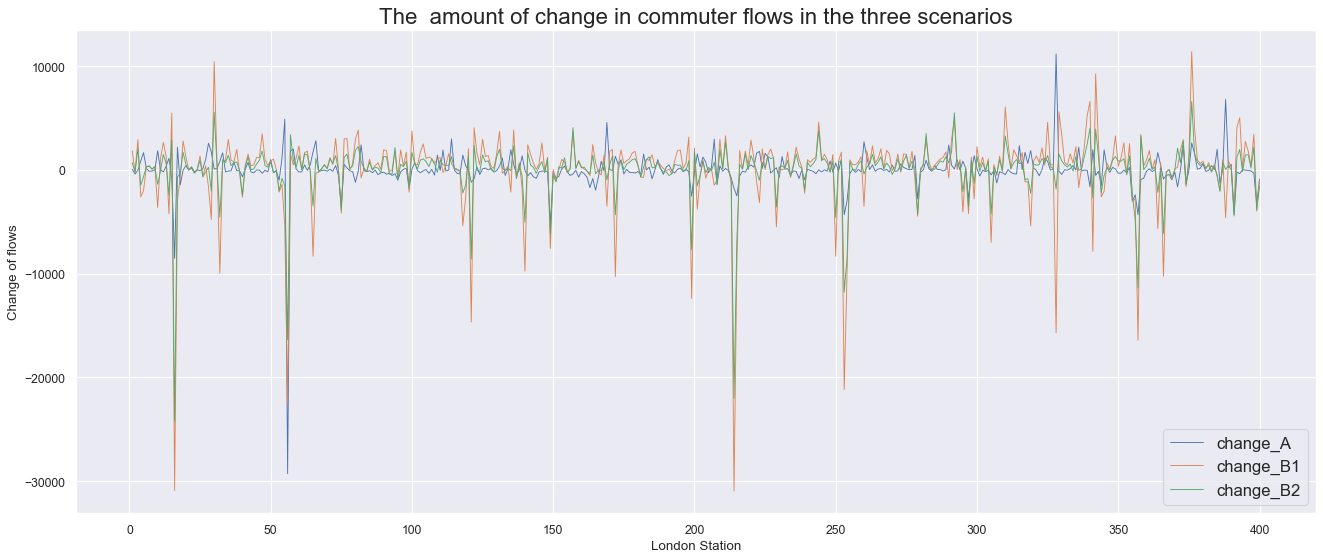

In [229]:
fig = plt.figure(figsize=(20, 8),dpi=80)
x=[a for a in range(1,401)]
plt.plot(x,change_A,linewidth=0.8,label='change_A')
plt.plot(x,change_B1,linewidth=0.8,label='change_B1')
plt.plot(x,change_B2,linewidth=0.8,label='change_B2')

plt.legend(loc='lower right',fontsize=15)
plt.xlabel("London Station")
plt.ylabel("Change of flows")
plt.title("The  amount of change in commuter flows in the three scenarios", fontsize = 20)

plt.show()

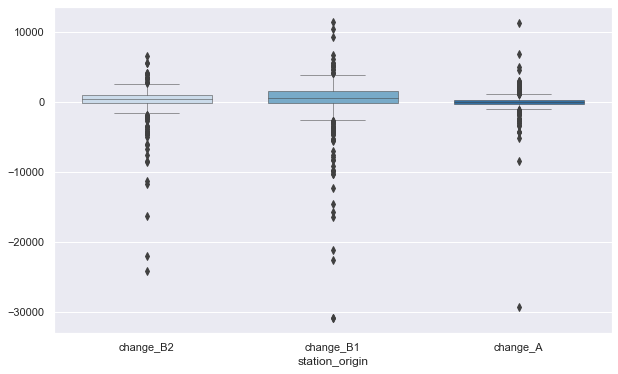

In [104]:
plt.figure(figsize=(10,6))

sns.set(style='darkgrid')
sns.boxplot(data=data.loc[:,['change_B2','change_B1','change_A']],linewidth=0.5,width=0.7,palette='Blues')
#plt.ylim(-10000,10000)
plt.xlabel("London Station")
plt.ylabel("Change of flows")
plt.title("Distribution of the amount of change in commuter flows in the three scenarios", fontsize = 13)
plt.show()